In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import plotly.express as px

#### Loading Bitcoin Price Dataset

In [14]:
df_bitcoin=pd.read_csv("Bitcoin_bitmex.csv",usecols=['timestamp','close','open'],index_col='timestamp',parse_dates=True)
df_bitcoin.head()

,open,close
timestamp,,
2015-09-25 13:00:00+00:00,239.99,237.45
2015-09-25 14:00:00+00:00,237.45,236.08
2015-09-25 15:00:00+00:00,236.08,236.34
2015-09-25 16:00:00+00:00,236.34,235.71
2015-09-25 17:00:00+00:00,235.71,235.75


#### Loading S&P 500 Stock Price Dataset

In [16]:
df_SP=pd.read_csv("HistoricalData_S&P.csv",index_col='Date',parse_dates=True)
df_SP.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-08,4227.26,--,4233.81,4236.74,4208.41
2021-06-07,4226.52,--,4229.34,4232.34,4215.66
2021-06-04,4229.89,--,4206.05,4233.45,4206.05
2021-06-03,4192.85,--,4191.43,4204.39,4167.93
2021-06-02,4208.12,--,4206.82,4217.37,4198.27


In [17]:
df_SP.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-06-15,2071.50,--,2077.60,2085.65,2069.80
2016-06-14,2075.32,--,2076.65,2081.30,2064.10
2016-06-13,2079.06,--,2091.75,2098.12,2078.46
2016-06-10,2096.07,--,2109.57,2109.57,2089.96
2016-06-09,2115.48,--,2115.65,2117.64,2107.73


#### Considering data from year 2017 onwards

In [18]:
df_bitcoin=df_bitcoin['2017':]
df_SP=df_SP[::-1]["2017":]

In [19]:
df_SP['Close']=df_SP['Close/Last']

#### Resampling Bitcoin data from Hourly to DAILY

In [20]:
bitcoin_daily=df_bitcoin['close'].resample("D").mean()

#### Finding Daily Returns of both Bitcoin and S&P 500 stock Prices

In [21]:
bitcoin_daily_returns=bitcoin_daily.pct_change()
SP_daily_returns=df_SP['Close'].pct_change()


#### Plotting Daily Returns

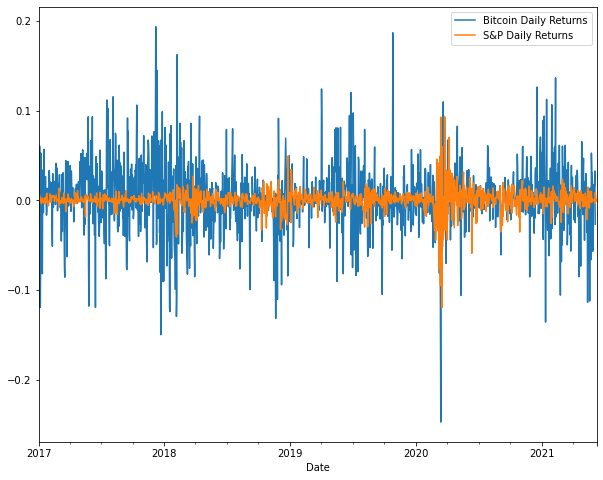

In [22]:
bitcoin_daily_returns.plot(figsize=(10,8),label='Bitcoin Daily Returns',legend=True)
SP_daily_returns.plot(label='S&P Daily Returns',legend=True)

#### Resampling  Prices to Monthly

In [23]:
bitcoin_monthly=df_bitcoin['close'].resample("MS").mean()
SP_monthly=df_SP['Close'].resample('MS').mean()

#### Finding Monthly Returns for Bitcoin as well as S&P stock Prices

In [24]:
bitcoin_monthly_returns=bitcoin_monthly.pct_change()
SP_monthly_returns=SP_monthly.pct_change()


#### Plotting Monthly Returns

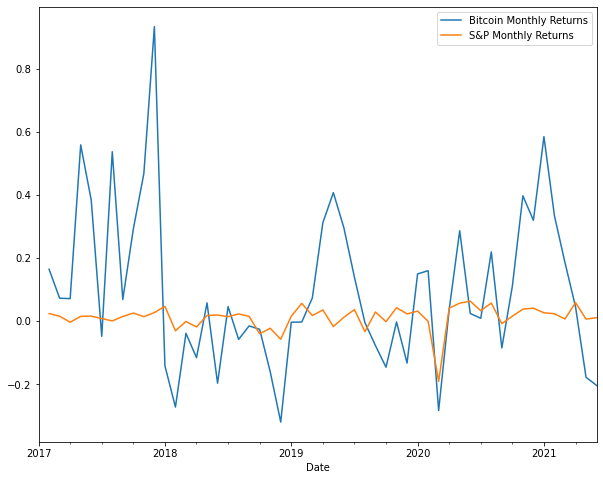

In [25]:
bitcoin_monthly_returns.plot(figsize=(10,8),label='Bitcoin Monthly Returns',legend=True)
SP_monthly_returns.plot(label='S&P Monthly Returns',legend=True)

### From the plots above,we can clearly see that Bitcoin is much more volatile than S&P 500 Stock Prices

#### Calculating Volatility based on Monthly Returns

In [26]:
Volatility_Bitcoin=bitcoin_monthly_returns.std()
print(f'The Volatility of Bitcoin using Monthly Returns :{Volatility_Bitcoin}')


The Volatility of Bitcoin using Monthly Returns :0.2501840622385359


In [27]:
Volatility_SP=SP_monthly_returns.std()
print(f'The Volatility of S&P 500 using Monthly Returns :{Volatility_SP}')


The Volatility of S&P 500 using Monthly Returns :0.03818245298907299


### So Bitcoin has a volatility of around 25% which is much greater than 3% volatility of S&P 500 Stocks

#### Now,suppose that there are 2 investors A and B .Both invested a sum of 10000 dollars at the start of Jan 2017 for 40 months.A invested in Bitcoin  and B invested in S&P 500 stocks 



#### Compounding Factor of Bitcoin and S&P Index

In [28]:
cf_bitcoin= bitcoin_monthly.loc['2021-05-01']/bitcoin_monthly.loc['2017-01-01']
cf_SP= SP_monthly.loc['2021-05-01']/SP_monthly.loc['2017-01-01']

#### A's maturity amount

In [29]:
A=10000*cf_bitcoin
A

517688.7033640509

#### B's maturity amount

In [30]:
B=10000*cf_SP
B

18319.283500269878

### Thus,on investment of 10 K dollars ,A would have around 518 K dollars while B would have around 18 K dollars as on 1st May 2021